NLP Term Project    

This project aims at music generation using LSTM model. Although such pretrained models (eg, WaveNet) exist, we have tried to make our own sequential model, and experimented with dropouts and FCL  
  
Furthermore, this project is run on far more limited resources than traditional models, and thus we have made a much slimmer network.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Music is stored electronically in MIDI format, which is lightweight and easy to transmit on low bandwidth. The CSV and corresponding sheet representation of MIDI is as follows:  <insert img>  
  
Here, we load and examine the data

In [ ]:
from music21 import *
import os
# filepath = '/content/drive/MyDrive/NLP project/archive'
#filepath = '/content/drive/MyDrive/NLP Assignments/TP/archive'
filepath = '/content/drive/MyDrive/NLP'
composer = 'beeth'
filepath = os.path.join(filepath, composer)
os.chdir(filepath)

In [ ]:
raw_midi=[]

for mid in os.listdir(filepath):
  fullpath = os.path.join(filepath,mid)
  if fullpath.endswith('.mid'):
    midi_file = converter.parse(fullpath)                   #parsing midi file
    raw_midi.append(midi_file)

In [ ]:
print(raw_midi)
print(len(raw_midi))

[<music21.stream.Score 0x7f445a028bd0>, <music21.stream.Score 0x7f446544b090>, <music21.stream.Score 0x7f446544bf50>, <music21.stream.Score 0x7f445b32e5d0>, <music21.stream.Score 0x7f44606d0e10>, <music21.stream.Score 0x7f44606d0150>, <music21.stream.Score 0x7f4462e50a50>, <music21.stream.Score 0x7f445ce95cd0>, <music21.stream.Score 0x7f4460946c50>, <music21.stream.Score 0x7f44606773d0>, <music21.stream.Score 0x7f446134b810>, <music21.stream.Score 0x7f4460ea39d0>, <music21.stream.Score 0x7f446341bd90>, <music21.stream.Score 0x7f446502f110>, <music21.stream.Score 0x7f4463750890>, <music21.stream.Score 0x7f4457006590>, <music21.stream.Score 0x7f4455460c10>, <music21.stream.Score 0x7f4466409d10>, <music21.stream.Score 0x7f445c900510>, <music21.stream.Score 0x7f44659ca910>, <music21.stream.Score 0x7f444f809c50>, <music21.stream.Score 0x7f444e801f10>, <music21.stream.Score 0x7f444e801390>, <music21.stream.Score 0x7f44523f5390>, <music21.stream.Score 0x7f444d079f50>, <music21.stream.Score 0x

In [ ]:
def note_stream(raw_midi):
  notes = []
  to_parse = None
  for j in raw_midi:
      songs = instrument.partitionByInstrument(j)                               #grouping based on different instruments
      song_note = []                          
      for part in songs.parts:
          to_parse = part.recurse()
          for element in to_parse:                                              #finding whether a particular element is note or a chord
              if isinstance(element, note.Note):                                #note
                  song_note.append(str(element.pitch))
              elif isinstance(element, chord.Chord):                            #chord
                  song_note.append(".".join(str(n) for n in element.normalOrder))
      notes.append(song_note)


  return notes

music_seq = note_stream(raw_midi)
corpus = [s for ls in music_seq for s in ls]


In [ ]:
print(corpus)
print('\nTotal length of corpus {}'.format(len(corpus)))


['3.7', '5.10', '3.7', '0', 'E-4', '0.3', 'G#4', 'G4', '4.10', 'G4', '4.10', 'C#5', 'C5', '5.9', 'C5', '6.8', '0.2', 'B4', 'C5', 'D5', 'E-5', 'E-4', 'G3', 'G2', '3.6', 'A3', 'C5', '7.11.2', 'B3', 'G5', 'E-6', 'E-6', 'E-5', 'G4', 'G3', '3.6', 'A4', 'C6', '7.11.2', 'B4', '7.10.2', '7.10', 'B-5', 'D5', '5.8', 'B-4', 'E-5', '3.7', 'F5', '2.5', 'B-4', 'C5', 'A4', '10.2', 'B-4', 'G#4', '1.4.7.10', '2.5.8', '10', '3.6', '11', 'F#4', 'E-4', '6.11', 'B4', '11.4', '1.6', 'E4', 'B-4', '1.6', 'E5', '3', '6.11', 'E-5', 'B-2', 'F#3', '3.5', 'D5', 'E-5', 'F5', 'F#5', 'C5', 'A2', 'C5', 'F3', 'E-5', '10.2', '5.10', 'B-4', 'C#5', 'G#2', 'E3', '1.3', 'C5', 'C#5', 'E-5', 'E5', 'G2', 'B-4', 'E-3', 'E-5', 'C#5', '8.11', '3.8', '10.3', '6.10', '8.10.2', '5.10', '8.10.2', '5.10', '3.6.10', '10.3', '3.6.10', '10.3', '5.10', '10.2', '10.2', '5.8', '10.3', '3.6', '10.3', '3.6', '5.10', '2.5', '5.10', '2.5', '7.10', '1.3', '8', '11.3', '8', '11.3', '5.10', '2.5', '7.10', '1.3', '8', '0.3', '8', '0.3', '8', '0.3',

In [ ]:
import IPython
from IPython.display import Image, Audio

In [ ]:
# enables muender images of musical notes
print('installing lilypond...')
!apt-get install lilypond > /dev/null

# converts midi files to wav files into order to play them
print('installing fluidsynth...')
!apt install fluidsynth
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2
!pip install midi2audio

print('done!')

installing lilypond...
installing fluidsynth...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fluidsynth is already the newest version (1.1.9-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
done!


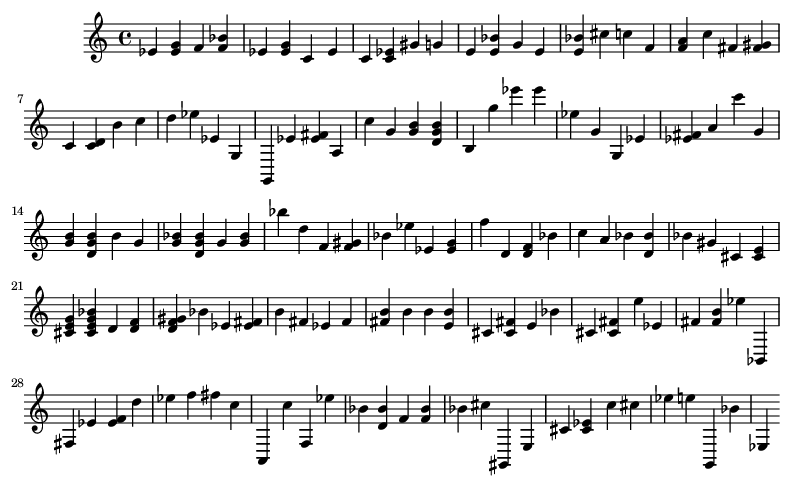

In [ ]:
def show(music):
    display(Image(str(music.write("lily.png"))))
    
def chords_n_notes(Snippet):
    Melody = []
    offset = 0 #Incremental
    for i in Snippet:
        #If it is chord
        if ("." in i or i.isdigit()):
            chord_notes = i.split(".") #Seperating the notes in chord
            notes = [] 
            for j in chord_notes:
                inst_note=int(j)
                note_snip = note.Note(inst_note)            
                notes.append(note_snip)
                chord_snip = chord.Chord(notes)
                chord_snip.offset = offset
                Melody.append(chord_snip)
        # pattern is a note
        else: 
            note_snip = note.Note(i)
            note_snip.offset = offset
            Melody.append(note_snip)
        # increase offset each iteration so that notes do not stack
        offset += 1
    Melody_midi = stream.Stream(Melody)   
    return Melody_midi

Melody_Snippet = chords_n_notes(corpus[:100])
show(Melody_Snippet)

In [ ]:
# from midi2audio import FluidSynth
# from IPython.display import Audio

# FluidSynth("font.sf2").midi_to_audio('/content/drive/MyDrive/NLP project/archive/beeth/appass_1.mid', 'test.wav')
# Audio("test.wav")

In [ ]:
# IPython.display.Audio("test.wav") 

In [ ]:
from collections import Counter
count_notes=Counter(corpus)

In [ ]:
from collections import Counter
count_notes=Counter(corpus)
print(count_notes)
print("length of corpus:",len(corpus))
print("number of unique notes/chords in corpus:",len(count_notes.keys()))
print("Average frequency of each note:",sum(count_notes.values())//len(count_notes.values()))
print("Most frequent note in corpus : {} appeared {} time".format(count_notes.most_common(1)[0][0], count_notes.most_common(1)[0][1]))

Counter({'C4': 2388, 'C5': 2296, 'G3': 2074, 'G5': 1929, 'F4': 1872, 'E-5': 1864, 'G4': 1856, 'F5': 1848, 'B-3': 1838, 'E-4': 1818, 'B-4': 1783, 'E-3': 1698, 'G#3': 1698, 'D5': 1668, 'F3': 1657, 'B3': 1529, 'G#4': 1480, 'C3': 1456, 'D4': 1426, 'E4': 1396, 'B4': 1369, 'A4': 1355, 'A3': 1329, 'A5': 1320, 'G#5': 1312, 'C#5': 1292, 'E5': 1268, 'C6': 1198, 'E3': 1184, 'D3': 1171, 'C#4': 1156, 'F#4': 1147, 'B-2': 1114, 'B-5': 1083, 'G#2': 1033, 'G2': 938, 'B5': 884, 'F#3': 873, 'C2': 872, 'F#5': 867, 'F2': 810, 'C#3': 799, 'D6': 756, 'B2': 702, 'A2': 648, 'E-6': 622, '5.8': 601, '0': 589, 'C#6': 569, 'F6': 551, '7.10': 508, '7': 500, '5': 487, 'E-2': 475, '0.3': 463, 'E6': 455, '3.7': 439, '10': 436, 'B-1': 428, '2.5': 427, 'C#2': 396, '4.7': 353, '9.0': 351, '11.2': 346, '8': 344, '11': 337, '3.7.10': 335, 'F#2': 330, 'D2': 307, '10.1': 305, '10.2': 304, '1': 300, '0.4': 299, 'F1': 297, '10.2.5': 294, 'G6': 292, '3': 291, 'E2': 290, '3.6': 287, 'G#1': 284, '2': 274, '6': 264, '4': 260, 'G1'

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import numpy as np 
import pandas as pd 

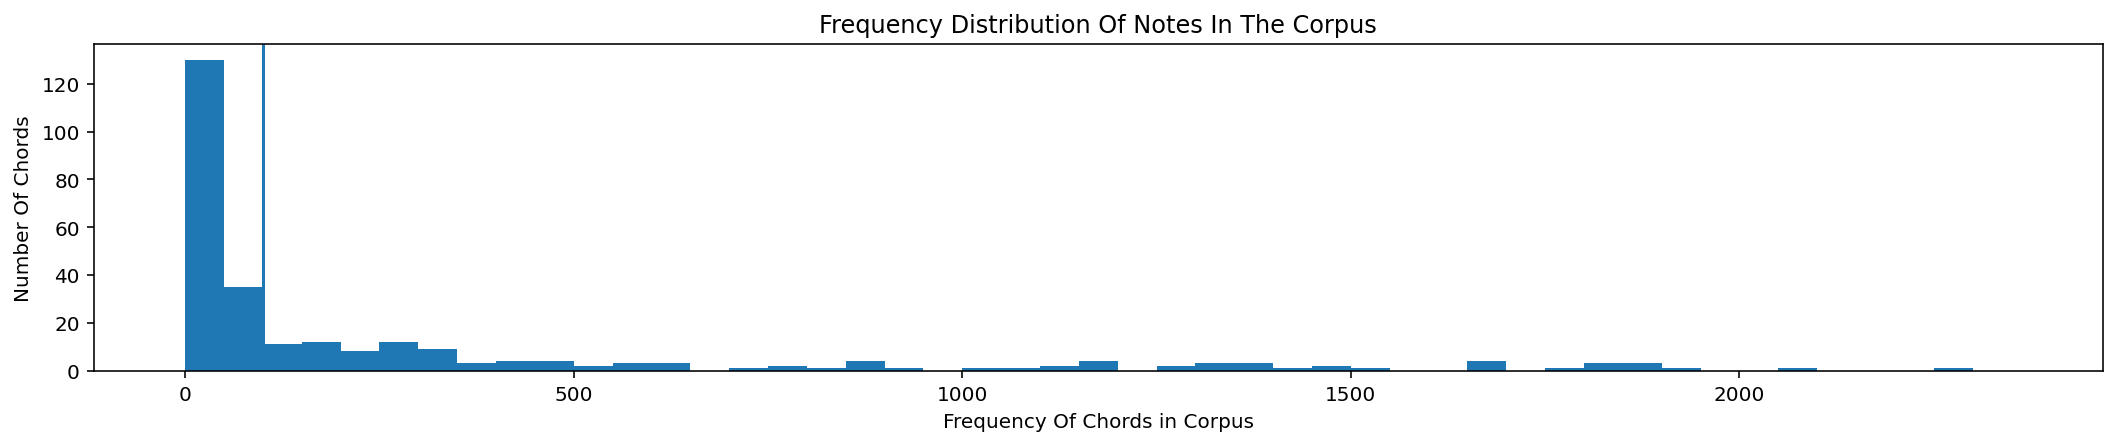

In [ ]:
plt.figure(figsize=(18,3))
bins = np.arange(0,(max(count_notes.values())), 50) 
plt.hist(count_notes.values(), bins=bins)
plt.axvline(x=100)
plt.title("Frequency distribution of notes in the corpus")
plt.xlabel("Chords hash")
plt.ylabel("Number Of chords")
plt.show()

In [ ]:
# eliminating rare notes
rare = []

for index, (key, value) in enumerate(count_notes.items()):
    if value < 100:
        rare.append(key)
        
print("Number of rare notes:", len(rare))
for element in corpus:
    if element in rare:
        corpus.remove(element)

print("Length of Corpus after removing  rare notes:", len(corpus))


Number of rare notes: 165
Length of Corpus after removing  rare notes: 82791


In [ ]:
# data preprocessing
#   - map notes to int and vice versa (encoding and decoding)
#   - batch creation
#   - train_test_split
#   - retrieving decoging (actual note)

In [ ]:
unique_notes = sorted(list(set(corpus)))

note_to_int = dict((c, i) for i, c in enumerate(unique_notes))
int_to_note = dict((i, c) for i, c in enumerate(unique_notes))

n_feat = len(np.unique(corpus))
print("number of  notes/chords in corpus:",len(corpus))
print("number of unique notes/chords in corpus:",n_feat)

number of  notes/chords in corpus: 82791
number of unique notes/chords in corpus: 220


In [ ]:
#Splitting the Corpus in equal length of strings and output target
seq_length = 40
features = []
targets = []
for i in range(0, len(corpus) - seq_length,1):
    feature = corpus[i:i + seq_length]
    target = corpus[i + seq_length]
    features.append([note_to_int[j] for j in feature])
    targets.append(note_to_int[target])
    
    
L_datapoints = len(targets)
print("Total number of sequences in the Corpus:", L_datapoints)

Total number of sequences in the Corpus: 82751


In [ ]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# reshape X and normalize
X = (np.reshape(features, (L_datapoints, seq_length, 1)))/ float(n_feat)
# one hot encode the output variable
enc = OneHotEncoder()
# y = enc.fit_transform(np.array(targets).reshape(-1,1)) 
y = tf.keras.utils.to_categorical(targets) 

In [ ]:
print(X.shape)
print(y.shape)

(82751, 40, 1)
(82751, 220)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('The dimensions of the train sets and labels are as follows:\n')

print(X_train.shape)
print(y_train.shape)

The dimensions of the train sets and labels are as follows:

(66200, 40, 1)
(66200, 220)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(42)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0) 

'Tesla K80'

In [ ]:
# bidir model


In [ ]:
class Generator(nn.Module):

  def init(self, X_train, y_train):
    self.model = nn.Sequential(
        nn.LSTM(X.shape[1]*X.shape[2],hidden_size=512),
        nn.LSTM(512, 256),
        nn.Linear(256,n_feat),
        nn.Dropout(0.1),
        nn.Softmax(dim=1)
    ).to(device)
    self.optimizer=optim.Adamax(model.parameters())
    self.criterion = nn.CrossEntropyLoss()
    model.cuda()

  def forward(self, x):
    x=self.model(X_train, y_train)
    return x
    

In [ ]:
model =nn.Sequential(
    nn.LSTM(X.shape[2],hidden_size=512),
    nn.LSTM(512, 256),
    nn.Linear(256,n_feat),
    nn.Dropout(0.1),
    nn.LogSoftmax(dim=1)
).to(device).double()
optimizer=optim.Adamax(model.parameters())
criterion = nn.NLLLoss()

In [ ]:
epochs=100
mini_batch_size=128

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU, Bidirectional
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adamax
import time

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
# tf.debugging.set_log_device_placement(True)

In [ ]:
# working model creation

model = Sequential()

model.add(LSTM(512, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(256))
model.add(Dense(256))
model.add(Dropout(0.1))
model.add(Dense(y.shape[1], activation='softmax'))
#Compiling the model for training  

opt = Adamax(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['mse', 'mae', 'mape','accuracy'])

In [80]:
# alternate working model creation

model_alt = Sequential()

layer=(LSTM(512, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model_alt.add(Bidirectional(
    layer, merge_mode='concat', weights=None, backward_layer=None,
))
model_alt.add(GRU(256))
model_alt.add(Dense(512))   # wider network

model_alt.add(Dropout(0.1))
model_alt.add(Dense(y.shape[1], activation='softmax'))
#Compiling the model_alt for training  

opt = Adamax(learning_rate=0.01)
model_alt.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['mse', 'mae', 'mape','accuracy'])

In [ ]:
model.summary(line_length=None, positions=None, print_fn=None)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 512)           1052672   
                                                                 
 dropout (Dropout)           (None, 40, 512)           0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               787456    
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 220)               56540     
                                                                 
Total params: 1,962,460
Trainable params: 1,962,460
Non-

In [87]:
model_alt.build(X_train.shape)
model_alt.summary(line_length=None, positions=None, print_fn=None)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (66200, 40, 1024)        2105344   
 nal)                                                            
                                                                 
 gru (GRU)                   (66200, 256)              984576    
                                                                 
 dense_2 (Dense)             (66200, 512)              131584    
                                                                 
 dropout_2 (Dropout)         (66200, 512)              0         
                                                                 
 dense_3 (Dense)             (66200, 220)              112860    
                                                                 
Total params: 3,334,364
Trainable params: 3,334,364
Non-trainable params: 0
____________________________________________

In [ ]:
train_start=time.time()
history = model.fit(X_train, y_train, batch_size=mini_batch_size, epochs=epochs)
train_end=time.time()

elapsed = train_end - train_start
minutes = elapsed // 60
seconds = elapsed % 60
print("\n\nTraining time: {} : {}".format(minutes, seconds))

Epoch 1/100
518/518 [==============================] - 40s 62ms/step - loss: 4.5068 - mse: 0.0045 - mae: 0.0090 - mape: 4479754.5000 - accuracy: 0.0253
Epoch 2/100
518/518 [==============================] - 32s 61ms/step - loss: 4.4695 - mse: 0.0045 - mae: 0.0090 - mape: 4478844.5000 - accuracy: 0.0264
Epoch 3/100
518/518 [==============================] - 32s 61ms/step - loss: 4.4659 - mse: 0.0045 - mae: 0.0090 - mape: 4478870.5000 - accuracy: 0.0275
Epoch 4/100
518/518 [==============================] - 32s 61ms/step - loss: 4.4642 - mse: 0.0045 - mae: 0.0090 - mape: 4478722.0000 - accuracy: 0.0263
Epoch 5/100
518/518 [==============================] - 32s 61ms/step - loss: 4.4633 - mse: 0.0045 - mae: 0.0090 - mape: 4478721.0000 - accuracy: 0.0274
Epoch 6/100
518/518 [==============================] - 32s 61ms/step - loss: 4.4613 - mse: 0.0045 - mae: 0.0090 - mape: 4478581.0000 - accuracy: 0.0287
Epoch 7/100
518/518 [==============================] - 32s 61ms/step - loss: 4.4618 - ms

In [ ]:
model.save('/content/drive/MyDrive/NLP Assignments/TP/archive/saved model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/NLP Assignments/TP/archive/saved model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/NLP Assignments/TP/archive/saved model/assets


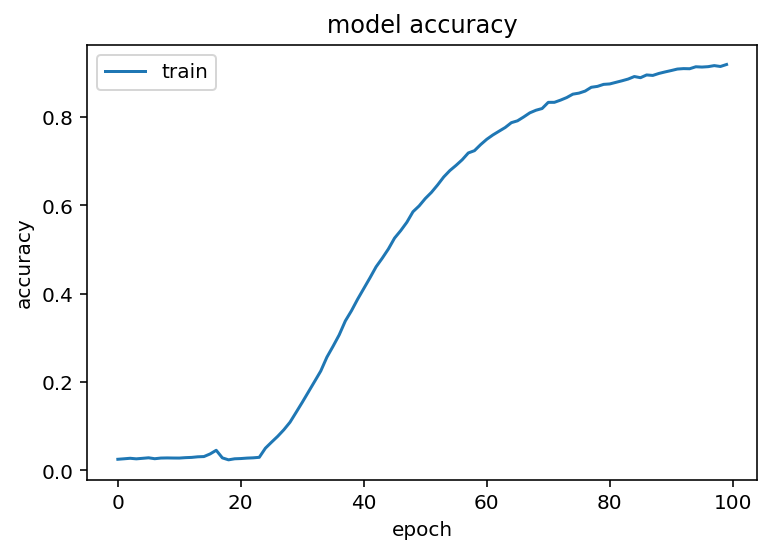

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

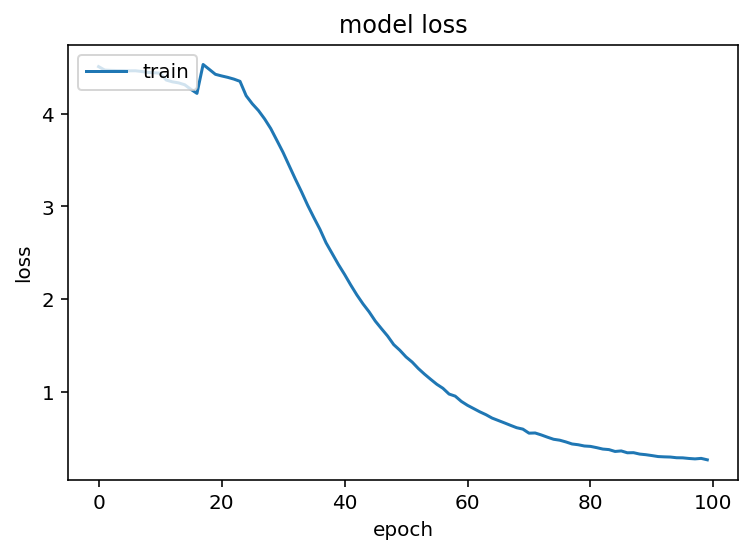

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

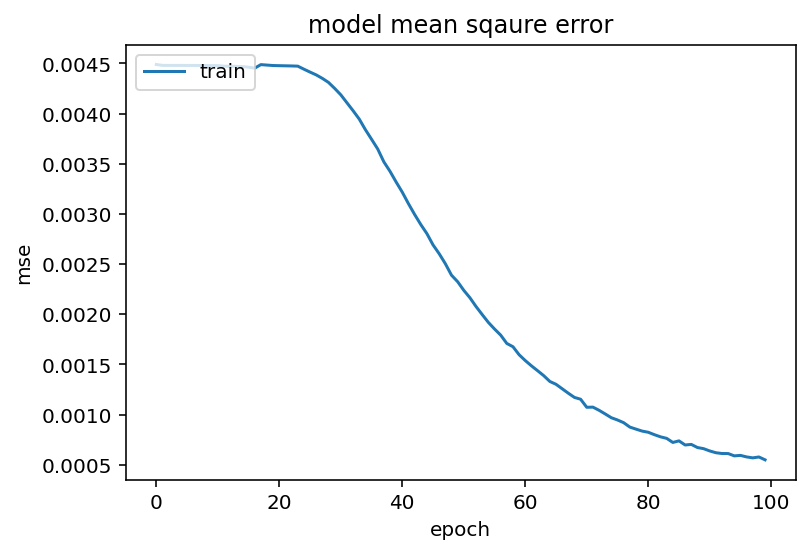

In [ ]:
plt.plot(history.history['mse'])
plt.title('model mean sqaure error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

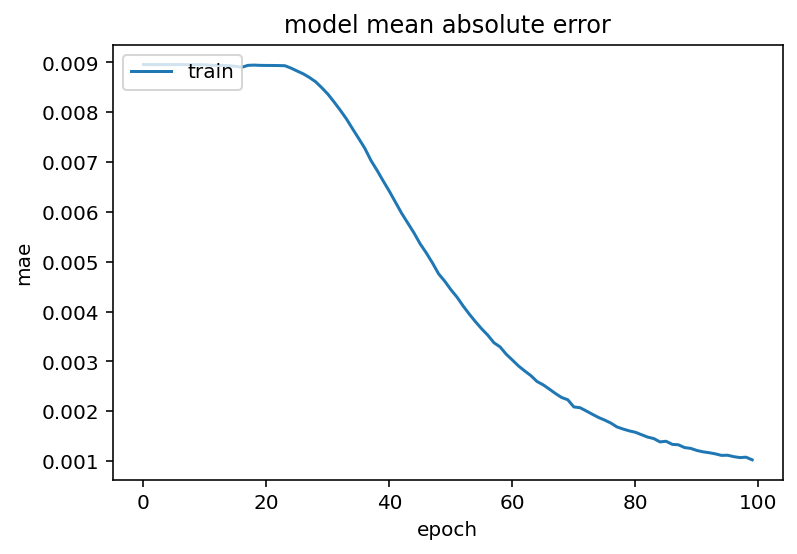

In [ ]:
plt.plot(history.history['mae'])
plt.title('model mean absolute error')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

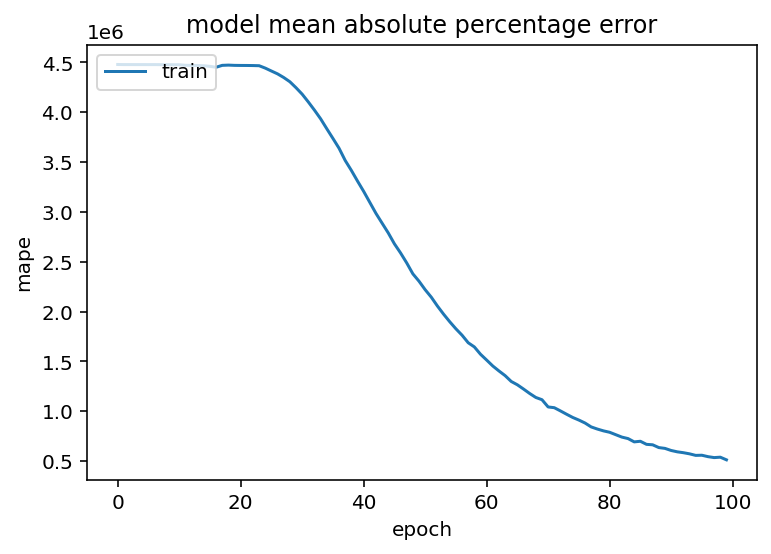

In [ ]:
plt.plot(history.history['mape'])
plt.title('model mean absolute percentage error')
plt.ylabel('mape')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/NLP Assignments/TP/archive/saved model')

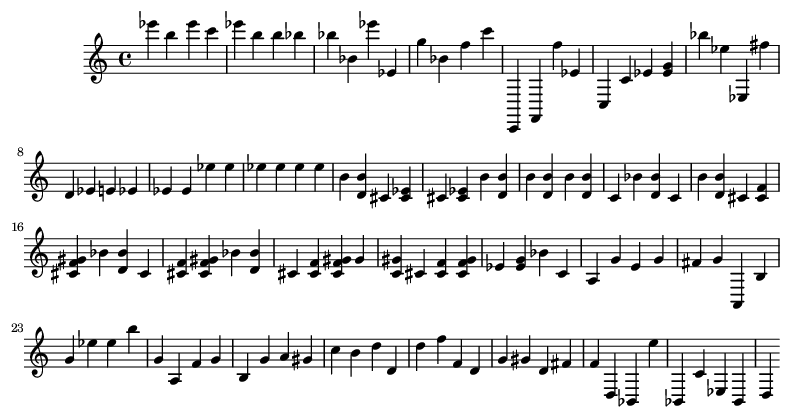

In [ ]:
def Melody_Generator(Note_Count):
    seed = X_test[np.random.randint(0,len(X_test)-1)]
    Music = ""
    Notes_Generated=[]
    for i in range(Note_Count):
        seed = seed.reshape(1,seq_length,1)
        prediction = model.predict(seed, verbose=0)[0]
        prediction = np.log(prediction) / 1.0 #diversity
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)
        index = np.argmax(prediction)
        index_N = index/ float(n_feat)   
        Notes_Generated.append(index)
        Music = [int_to_note[char] for char in Notes_Generated]
        seed = np.insert(seed[0],len(seed[0]),index_N)
        seed = seed[1:]
    #Now, we have music in form or a list of chords and notes and we want to be a midi file.
    Melody = chords_n_notes(Music)
    Melody_midi = stream.Stream(Melody)   
    return Music,Melody_midi


#getting the Notes and Melody created by the model
note_length = 100
Music_notes, Melody = Melody_Generator(note_length)
show(Melody)

In [ ]:
Melody.write('midi',filepath + 'Melody_Generated.mid')

'/content/drive/MyDrive/NLP/beethMelody_Generated.mid'